# Sitt Hmue Paing

## Research question/interests

My research question is to find whether the percentage of reviewers influence the score as well as focussing on the game that have both very positive and mixed reviews for both overall and recent reviews and find which game has the highest number of user's recent reviews.
- Does the change in recent review of different games affect the overall rating of the game?
- Which game receive the highest recent user's reviews in very positive rating categories?
- Which game receive the highest recent user's reviews in mixed rating categories?


# EDA

- Import pandas and numpy
- Load the file (steam_games.csv)

In [65]:
import pandas as pd
import numpy as np

1. Successfully read the file and it display all columns and rows.

In [66]:
gamedataset = pd.read_csv("../data/raw/steam_games.csv")
gamedataset.head()

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN


# Data Pipeline

2. Remove the columns in the table to will not be use to make the table cleaner

In [67]:
import project_functions3 as pf
# gamedata=(
#     gamedataset
#     .drop(columns=["url", "types", "game_description", "achievements", "minimum_requirements", "mature_content","recommended_requirements", "discount_price"])
#     .drop_duplicates(subset=["name"], inplace=False)
# )
# gamedata


gamedata = pf.dataloadnclean("../data/raw/steam_games.csv")
gamedata

,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,genre,original_price
0,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,$19.99
1,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",$29.99
2,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",$39.99
3,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",$44.99
4,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",Free
...,...,...,...,...,...,...,...,...,...,...,...,...
40828,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation",$2.99
40829,Rocksmith® 2014 Edition – Remastered – Stone T...,NaN,NaN,NaN,"Feb 5, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation",$2.99
40830,Fantasy Grounds - Quests of Doom 4: A Midnight...,NaN,NaN,NaN,"Jul 31, 2018","SmiteWorks USA, LLC",NaN,"RPG,Indie,Strategy,Software,Turn-Based,Fantasy...","Multi-player,Co-op,Cross-Platform Multiplayer,...",English,"Indie,RPG,Strategy",$7.99
40831,Mega Man X5 Sound Collection,NaN,NaN,NaN,"Jul 24, 2018","CAPCOM CO., LTD","CAPCOM CO., LTD,CAPCOM CO., LTD",Action,"Single-player,Downloadable Content,Steam Achie...","English,French,Italian,German,Spanish - Spain,...",Action,$9.99


3. Remove the column that contains bundle so that the analysis can be done on the game app to make things less complicated.

In [68]:
df= gamedataset[gamedataset["types"].str.contains("bundle")==False]
df

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40828,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7,

# Data Analysis

Checking the unique ratings in all_reviews 

In [69]:
gamedata['all_reviews'].unique()

array(['Very Positive,(42,550),- 92% of the 42,550 user reviews for this game are positive.',
       'Mixed,(836,608),- 49% of the 836,608 user reviews for this game are positive.',
       'Mostly Positive,(7,030),- 71% of the 7,030 user reviews for this game are positive.',
       ...,
       'Mixed,(2,044),- 55% of the 2,044 user reviews for this game are positive.',
       'Very Positive,(106),- 99% of the 106 user reviews for this game are positive.',
       'Very Positive,(469),- 96% of the 469 user reviews for this game are positive.'],
      dtype=object)

In [70]:
gamedata['recent_reviews'].unique()

array(['Very Positive,(554),- 89% of the 554 user reviews in the last 30 days are positive.',
       'Mixed,(6,214),- 49% of the 6,214 user reviews in the last 30 days are positive.',
       'Mixed,(166),- 54% of the 166 user reviews in the last 30 days are positive.',
       ...,
       'Very Negative,(20),- 15% of the 20 user reviews in the last 30 days are positive.',
       'Very Negative,(13),- 7% of the 13 user reviews in the last 30 days are positive.',
       'Mixed,(40),- 50% of the 40 user reviews in the last 30 days are positive.'],
      dtype=object)

# Splitting all_reviews column into different data and drop all_review column.
### Rating show wide range of users review (positive, Mixed Negative, etc..)

### Since all_reviews column is mixed with integer and string, I split them into columns for easier analysis.

# Splitting all_reviews column into different column as needed for analysis.

### Number of Users show the amount of people in total that review the game as positive.

### The result I am looking for is to get the percentage of the users that review the game as positive. The below column (Percentage of positive rating) shows the overall percentage of users rating the game as positive.

In [71]:
# new data frame with split value columns
df = gamedata
new = gamedata["all_reviews"].str.split(",", n = 1, expand = True)

gamedata.dropna(inplace = True)
 
# making separate first name column from new data frame
gamedata["Rating"]= new[0]

# making separate last name column from new data frame
gamedata["Number of users rated"]= new[1]
 
# Dropping old Name columns
gamedata.drop(columns =["all_reviews"], inplace = True)

# new data frame with split value columns
new = gamedata["Number of users rated"].str.split(",-", n = 1, expand = True)
 
# making separate first name column from new data frame
gamedata["Number of users"]= new[0]

# making separate last name column from new data frame
gamedata["Percentage of positive reviews"]= new[1]

gamedata.drop(columns =["Number of users rated"], inplace = True)

# new data frame with split value columns
new = gamedata["Percentage of positive reviews"].str.split("%", n = 1, expand = True)
 
# making separate first name column from new data frame
gamedata["Percentage of positive rating"]= new[0]

# making separate last name column from new data frame
gamedata["Numbers"]= new[1]

gamedata.drop(columns =["Percentage of positive reviews"], inplace = True)
gamedata.drop(columns =["Numbers"], inplace = True)
# gamedata.drop(columns =["Number of users"], inplace = True)
 
# df display
gamedata

,name,desc_snippet,recent_reviews,release_date,developer,publisher,popular_tags,game_details,languages,genre,original_price,Rating,Number of users,Percentage of positive rating
0,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,$19.99,Very Positive,"(42,550)",92
1,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",$29.99,Mixed,"(836,608)",49
2,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",$39.99,Mostly Positive,"(7,030)",71
3,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",$44.99,Mixed,"(167,115)",61
4,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",Free,Mostly Positive,"(11,481)",74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32238,The Wild Age,The Wild Age is a micromanagement strategy gam...,"Mixed,(10),- 40% of the 10 user reviews in the...","Mar 7, 2019",McMagic Productions,"McMagic Productions,McMagic Productions","Early Access,Casual,Strategy,Simulation,Early ...","Single-player,Steam Achievements,Full controll...","English,French,Russian,Czech,Spanish - Spain,D...","Casual,Indie,Simulation,Strategy,Early Access",$14.99,Mostly Positive,(61),75
34570,eSports Legend / 电竞传奇,Esports Legend is a Esports club simulator. Yo...,"Very Positive,(12),- 83% of the 12 user review...","Oct 16, 2018",90Games,"Coconut Island Games,Coconut Island Games","Indie,Strategy,Simulation,Casual,Management,e-...","Single-player,Steam Achievements,Steam Cloud","English,Simplified Chinese","Casual,Indie,Simulation,Strategy",$9.99,Mixed,(593),62
35297,KARAKARA,KARAKARA. It is the sound of aridity. It is th...,"Very Positive,(19),- 94% of the 19 user review...","Jun 27, 2016",calme,"Sekai Project,Sekai Project","Visual Novel,Anime,Sexual Content,Nudity,Cute,...","Single-player,Steam Achievements,Steam Trading...","English,Japanese,Traditional Chinese,German","Casual,Indie",$9.99,Overwhelmingly Positive,(789),96
38390,Moto Racer 4,Choose from a variety of daring riders and get...,"Mixed,(19),- 42% of the 19 user reviews in the...","Nov 3, 2016",Artefacts Studios,"Microids,Microids","Racing,Sports,Action,Multiplayer,Offroad,Arcad...","Single-player,Online Multi-Player,Shared/Split...","English,French,Italian,German,Spanish - Spain,...",Racing,$14.99,Mixed,(83),59


### This step is also split the columns like the I have done previously for all_reviews column but this time, its on recent_reviews column.
### I am repeating the same steps as I have done above for recent_reviews

In [72]:
# new data frame with split value columns
new = gamedata["recent_reviews"].str.split(",", n = 1, expand = True)

gamedata.dropna(inplace = True)
 
# making separate first name column from new data frame
gamedata["Rating(Recent Review)"]= new[0]

# making separate last name column from new data frame
gamedata["Number of users rated(Recent Review)"]= new[1]
 
# Dropping old Name columns
gamedata.drop(columns =["recent_reviews"], inplace = True)


# new data frame with split value columns
new = gamedata["Number of users rated(Recent Review)"].str.split(",-", n = 1, expand = True)
 
# making separate first name column from new data frame
gamedata["Number of users(Recent Review)"]= new[0]

# making separate last name column from new data frame
gamedata["Percentage of positive reviews(Recent Review)"]= new[1]

gamedata.drop(columns =["Number of users rated(Recent Review)"], inplace = True)


new = gamedata["Percentage of positive reviews(Recent Review)"].str.split("%", n = 1, expand = True)
 
# making separate first name column from new data frame
gamedata["Percentage of positive rating(Recent Review)"]= new[0]

# making separate last name column from new data frame
gamedata["Numbers(Recent Review)"]= new[1]

gamedata.drop(columns =["Percentage of positive reviews(Recent Review)"], inplace = True)
gamedata.drop(columns =["Numbers(Recent Review)"], inplace = True)
# gamedata.drop(columns =["Number of users(Recent Review)"], inplace = True)
 
# df display
gamedata

,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,genre,original_price,Rating,Number of users,Percentage of positive rating,Rating(Recent Review),Number of users(Recent Review),Percentage of positive rating(Recent Review)
0,DOOM,Now includes all three premium DLC packs (Unto...,"May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,$19.99,Very Positive,"(42,550)",92,Very Positive,(554),89
1,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",$29.99,Mixed,"(836,608)",49,Mixed,"(6,214)",49
2,BATTLETECH,Take command of your own mercenary outfit of '...,"Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",$39.99,Mostly Positive,"(7,030)",71,Mixed,(166),54
3,DayZ,The post-soviet country of Chernarus is struck...,"Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",$44.99,Mixed,"(167,115)",61,Mixed,(932),57
4,EVE Online,EVE Online is a community-driven spaceship MMO...,"May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",Free,Mostly Positive,"(11,481)",74,Mixed,(287),54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32238,The Wild Age,The Wild Age is a micromanagement strategy gam...,"Mar 7, 2019",McMagic Productions,"McMagic Productions,McMagic Productions","Early Access,Casual,Strategy,Simulation,Early ...","Single-player,Steam Achievements,Full controll...","English,French,Russian,Czech,Spanish - Spain,D...","Casual,Indie,Simulation,Strategy,Early Access",$14.99,Mostly Positive,(61),75,Mixed,(10),40
34570,eSports Legend / 电竞传奇,Esports Legend is a Esports club simulator. Yo...,"Oct 16, 2018",90Games,"Coconut Island Games,Coconut Island Games","Indie,Strategy,Simulation,Casual,Management,e-...","Single-player,Steam Achievements,Steam Cloud","English,Simplified Chinese","Casual,Indie,Simulation,Strategy",$9.99,Mixed,(593),62,Very Positive,(12),83
35297,KARAKARA,KARAKARA. It is the sound of aridity. It is th...,"Jun 27, 2016",calme,"Sekai Project,Sekai Project","Visual Novel,Anime,Sexual Content,Nudity,Cute,...","Single-player,Steam Achievements,Steam Trading...","English,Japanese,Traditional Chinese,German","Casual,Indie",$9.99,Overwhelmingly Positive,(789),96,Very Positive,(19),94
38390,Moto Racer 4,Choose from a variety of daring riders and get...,"Nov 3, 2016",Artefacts Studios,"Microids,Microids","Racing,Sports,Action,Multiplayer,Offroad,Arcad...","Single-player,Online Multi-Player,Shared/Split...","English,French,Italian,German,Spanish - Spain,...",Racing,$14.99,Mixed,(83),59,Mixed,(19),42


### Displaying the name that only have very positive rating from the users for different games to do the analysis
### Removing all the other columns that is not needed for analysis to have a clear dataset and easy to look at.
### The aim is to find the relationship between the percentage of positive rating for(Overall) compared to Percentage of positive rating(Recent Review)

In [83]:
tempt = gamedata[gamedata['Rating'].str.contains('Very Positive')]
tempt = tempt[tempt["Rating(Recent Review)"].str.contains("Mostly Negative")==False]
tempt = tempt[tempt["Rating(Recent Review)"].str.contains("Mostly Positive")==False]
tempt = tempt[tempt["Rating(Recent Review)"].str.contains("Overwhelmingly Positive")==False]
tempt = tempt[tempt["Rating(Recent Review)"].str.contains("Mixed")==False]

tempt=(
    tempt
    .drop(columns=["desc_snippet", "developer", "publisher", "popular_tags", "game_details", "languages","genre", "original_price"])
    
)

tempt['Number of users']=tempt['Number of users'].str.replace(r'[()]+', '', regex=True)
tempt['Number of users']=tempt['Number of users'].str.replace(r'[,]+', '', regex=True)
tempt['Number of users(Recent Review)']=tempt['Number of users(Recent Review)'].str.replace(r'[()]+', '', regex=True)
tempt['Number of users(Recent Review)']=tempt['Number of users(Recent Review)'].str.replace(r'[,]+', '', regex=True)


tempt.head(20)


,name,release_date,Rating,Number of users,Percentage of positive rating,Rating(Recent Review),Number of users(Recent Review),Percentage of positive rating(Recent Review)
0,DOOM,"May 12, 2016",Very Positive,42550,92,Very Positive,554,89
6,Devil May Cry 5,"Mar 7, 2019",Very Positive,9645,92,Very Positive,408,87
7,Human: Fall Flat,"Jul 22, 2016",Very Positive,23763,91,Very Positive,629,91
8,They Are Billions,"Dec 12, 2017",Very Positive,12127,85,Very Positive,192,83
10,For The King,"Apr 19, 2018",Very Positive,4600,83,Very Positive,67,80
11,Danganronpa V3: Killing Harmony,"Sep 25, 2017",Very Positive,3547,84,Very Positive,78,82
16,Clone Drone in the Danger Zone,"Mar 16, 2017",Very Positive,1901,94,Very Positive,88,94
19,Halo Wars: Definitive Edition,"Apr 20, 2017",Very Positive,2442,88,Very Positive,28,82
21,Phoenix Wright: Ace Attorney Trilogy / 逆転裁判123...,"Apr 9, 2019",Very Positive,382,97,Very Positive,47,95
27,Viscera Cleanup Detail,"Oct 23, 2015",Very Positive,5414,92,Very Positive,61,91


## The below step is to sort the values in descending order on number of users focussing on recent review of the game to see which game has a highest amount of review among all the game that have very positive reviews. It shows that there is 974 rows that has very positive reviews for both overall and recent review columns.

In [84]:
tempt['Number of users(Recent Review)'] = pd.to_numeric(tempt['Number of users(Recent Review)'].str[-4:], errors='coerce')
rslt_df = tempt.sort_values(by=('Number of users(Recent Review)'), ascending=False)


rslt_df.head(20)

,name,release_date,Rating,Number of users,Percentage of positive rating,Rating(Recent Review),Number of users(Recent Review),Percentage of positive rating(Recent Review)
422,Counter-Strike: Global Offensive,"Aug 21, 2012",Very Positive,3094223,86,Very Positive,6076,86
416,Tom Clancy's Rainbow Six® Siege,"Dec 1, 2015",Very Positive,248689,81,Very Positive,4583,82
386,Team Fortress 2,"Oct 10, 2007",Very Positive,553458,93,Very Positive,3526,91
408,Warframe,"Mar 25, 2013",Very Positive,250319,91,Very Positive,2837,83
661,Unturned,"Jul 7, 2017",Very Positive,325675,90,Very Positive,2028,84
320,Paladins®,"May 8, 2018",Very Positive,204137,83,Very Positive,2026,80
4559,探灵笔记-1v5(Notes of Soul),"Jun 6, 2019",Very Positive,5619,87,Very Positive,1527,89
836,Mutant Year Zero: Road to Eden,"Dec 4, 2018",Very Positive,4412,87,Very Positive,1448,90
8924,SCP: Secret Laboratory,"Dec 29, 2017",Very Positive,24794,84,Very Positive,1211,86
385,Risk of Rain 2,"Mar 28, 2019",Very Positive,16312,94,Very Positive,1202,88


c:\Users\sitth\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36870 (\N{CJK UNIFIED IDEOGRAPH-9006}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sitth\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36578 (\N{CJK UNIFIED IDEOGRAPH-8EE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sitth\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35009 (\N{CJK UNIFIED IDEOGRAPH-88C1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sitth\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21028 (\N{CJK UNIFIED IDEOGRAPH-5224}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sitth\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  fig.canvas.print_figure(b

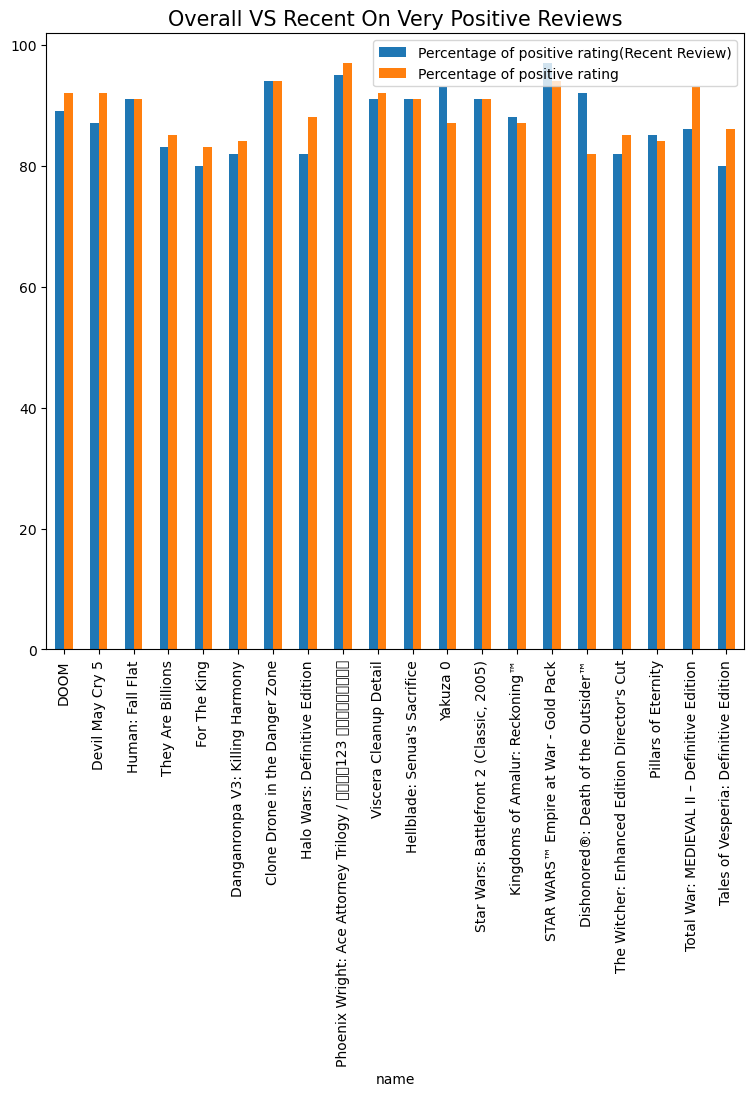

In [74]:
import pandas as pd
import matplotlib.pyplot as mp
import matplotlib.pyplot as plt


tempt['Percentage of positive rating(Recent Review)']=df['Percentage of positive rating(Recent Review)'].astype(int)
tempt['Percentage of positive rating']=df['Percentage of positive rating'].astype(int)

data = tempt.head(20)
df = pd.DataFrame(data, columns= ["name","Percentage of positive rating(Recent Review)", "Percentage of positive rating"])

df.plot(x="name", y = ["Percentage of positive rating(Recent Review)", "Percentage of positive rating"], kind ="bar", figsize=(9,8))
plt.title("Overall VS Recent On Very Positive Reviews", fontsize = 15)

mp.show()


The bar graphs shows the comparison between recent and overall users review percentage on very positive rated game. All the rating in the graph both recent and overall only consist of positive review and as we can see there are some variation in the graph as the overall percentage increase/decrease or no change. The increases in overall percentage clearly tell us that there is a rise in recent positive review which in turn increase the growth of overall positive review. For decrease positive review, there may be reasons like the number of negative reviews exceeded that of the number of positive review from the user hence it will dropped the overall positive percent review. For no change graph, we can say that both the negative rating and the positive rating from the users are equal so there will be no further changes on the overall reviews. It shows that the change in recent positive review influence the change in overall positive reviews. The game get the overall rating of very positive since the positive user from both current and previous number greatly out weight the number of negative rating from different users from previous or current.

C:\Users\sitth\AppData\Local\Temp\ipykernel_1896\4282598196.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',
c:\Users\sitth\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25506 (\N{CJK UNIFIED IDEOGRAPH-63A2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sitth\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28789 (\N{CJK UNIFIED IDEOGRAPH-7075}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sitth\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31508 (\N{CJK UNIFIED IDEOGRAPH-7B14}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sitth\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35760 (\N{CJK UNIFIE

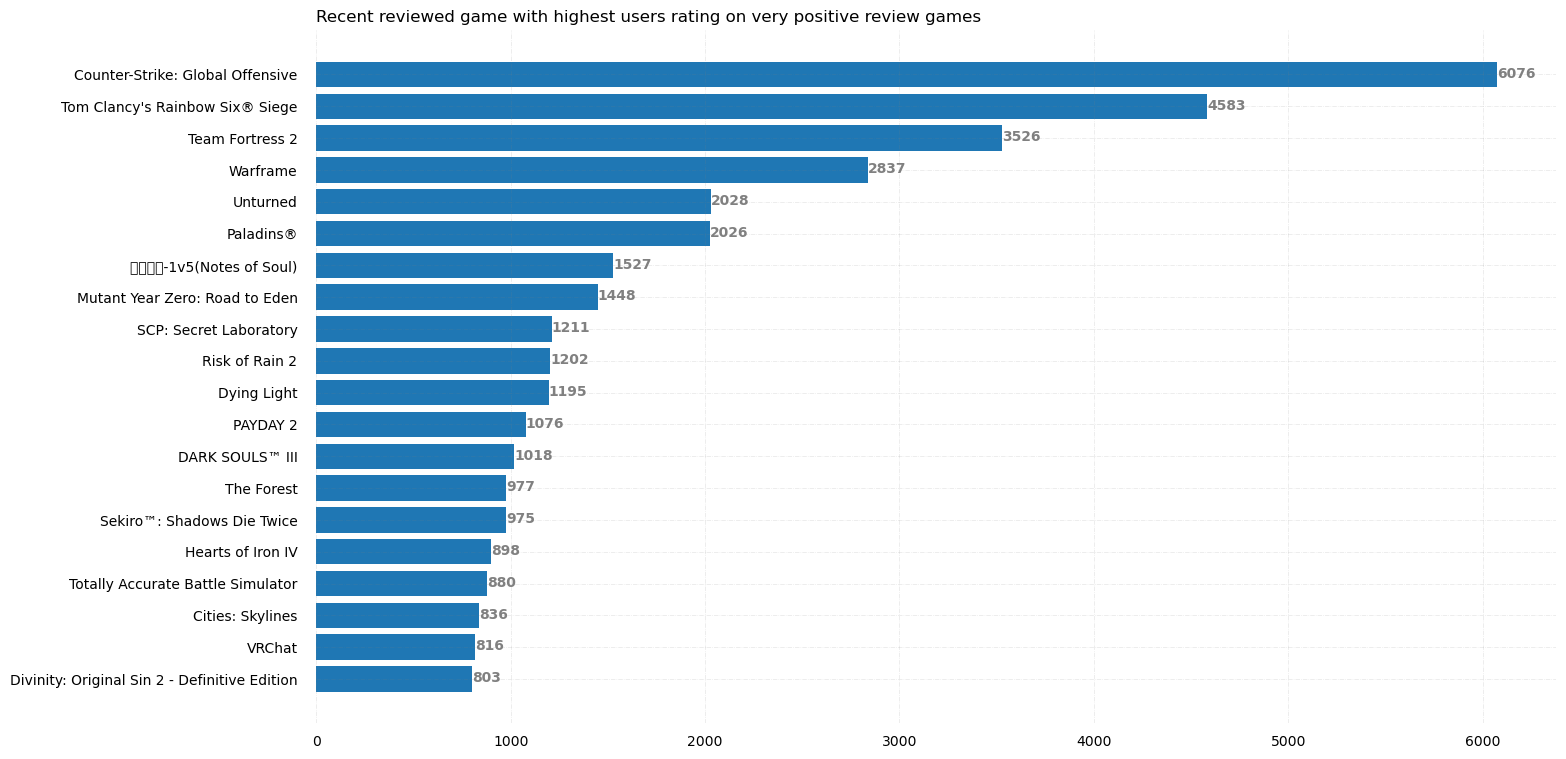

In [76]:
data = rslt_df
data.head()
df = pd.DataFrame(data)

name = df['name'].head(20)
number = df['Number of users(Recent Review)'].head(20)

fig , ax = fig, ax = plt.subplots(figsize =(16, 9))

ax.barh(name, number)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Recent reviewed game with highest users rating on very positive review games',
             loc ='left', )

plt.show()


The graph above clearly shows that Counter-Strike game has the highest recent users in very positive review categories, followed by Rainbow Six Siege and Team Fortress 2.

## In this step, I am only trying to get mixed feedback from the overall and recent reviews. Both overall and recent percent reviews have the same mixed reviews and I have filtered out any other reviews that is not needed. It shows that there is 287 rows that has mixed reviews for both overall and recent review columns.

The next step, is to remove the unnecessary column and to make the table less messy. In here we can see all the games that have mixed review with for both recent rating and overall rating including their percentage. 

In [77]:
tempt2 = gamedata[gamedata['Rating'].str.contains('Mixed')]
tempt2 = tempt2[tempt2["Rating(Recent Review)"].str.contains("Very Positive")==False]
tempt2 = tempt2[tempt2["Rating(Recent Review)"].str.contains("Mostly Negative")==False]
tempt2 = tempt2[tempt2["Rating(Recent Review)"].str.contains("Mostly Positive")==False]
tempt2 = tempt2[tempt2["Rating(Recent Review)"].str.contains("Overwhelmingly Positive")==False]

tempt2['Number of users']=tempt2['Number of users'].str.replace(r'[()]+', '', regex=True)
tempt2['Number of users']=tempt2['Number of users'].str.replace(r'[,]+', '', regex=True)
tempt2['Number of users(Recent Review)']=tempt2['Number of users(Recent Review)'].str.replace(r'[()]+', '', regex=True)
tempt2['Number of users(Recent Review)']=tempt2['Number of users(Recent Review)'].str.replace(r'[,]+', '', regex=True)

tempt2=(
    tempt2
    .drop(columns=["desc_snippet", "release_date", "developer", "publisher", "popular_tags", "game_details", "languages","genre", "original_price"])
    
)
tempt2.head(20)

,name,Rating,Number of users,Percentage of positive rating,Rating(Recent Review),Number of users(Recent Review),Percentage of positive rating(Recent Review)
1,PLAYERUNKNOWN'S BATTLEGROUNDS,Mixed,836608,49,Mixed,6214,49
3,DayZ,Mixed,167115,61,Mixed,932,57
13,Call of Duty®: Modern Warfare® Remastered,Mixed,1118,51,Mixed,33,51
18,War Robots,Mixed,1797,44,Mixed,91,49
24,Grand Theft Auto IV,Mixed,43799,63,Mixed,303,66
30,Tree of Savior (English Ver.),Mixed,15461,60,Mixed,198,46
36,Wizard101,Mixed,805,68,Mixed,40,62
48,Street Fighter V,Mixed,9007,52,Mixed,97,50
67,Gang Beasts,Mixed,16225,69,Mixed,105,66
75,Call of Duty®: WWII,Mixed,12703,54,Mixed,66,53


## The below step is to sort the values in descending order on number of users focussing on recent review of the game to see which game has a highest amount of review among all the game that have mixed reviews.

In [78]:
#  df2 = tempt2.sort_values(by='Number of users', key=lambda col: col.str.lower())
#  df2.Col = pd.to_numeric('Number of users', errors='coerce')
#  df2

# print(tempt2.columns.tolist())
tempt2['Number of users(Recent Review)'] = pd.to_numeric(tempt2['Number of users(Recent Review)'].str[-4:], errors='coerce')
rslt_df1 = tempt2.sort_values(by=('Number of users(Recent Review)'), ascending = False)


rslt_df1.head(20)

,name,Rating,Number of users,Percentage of positive rating,Rating(Recent Review),Number of users(Recent Review),Percentage of positive rating(Recent Review)
1,PLAYERUNKNOWN'S BATTLEGROUNDS,Mixed,836608,49,Mixed,6214,49
305,KurtzPel,Mixed,5388,56,Mixed,3239,56
394,BATTALION 1944,Mixed,8984,57,Mixed,2423,68
3,DayZ,Mixed,167115,61,Mixed,932,57
95,Heroes & Generals,Mixed,101309,65,Mixed,906,56
361,Mortal Kombat 11,Mixed,6842,59,Mixed,776,66
265,Albion Online,Mixed,4745,54,Mixed,752,48
6104,Business Tour - Board Game with Online Multipl...,Mixed,16040,63,Mixed,651,56
459,Watch_Dogs™,Mixed,21159,66,Mixed,639,66
175,Far Cry® 5,Mixed,31338,67,Mixed,527,65


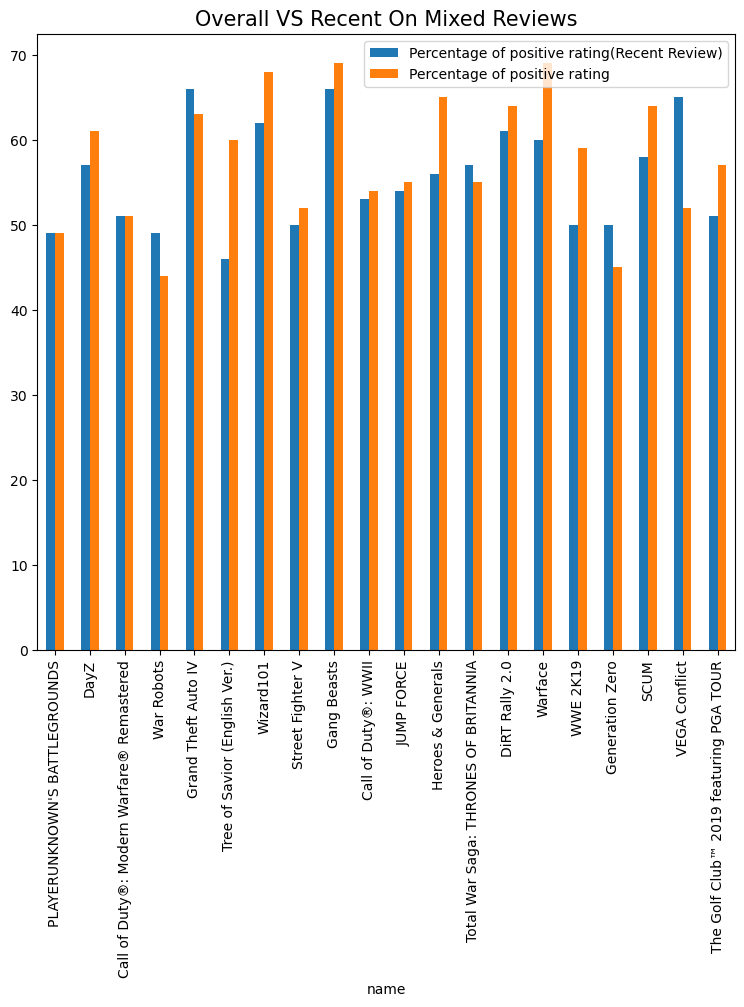

In [79]:
import pandas as pd
import matplotlib.pyplot as mp
import matplotlib.pyplot as plt


tempt2['Percentage of positive rating(Recent Review)']=tempt2['Percentage of positive rating(Recent Review)'].astype(int)
tempt2['Percentage of positive rating']=tempt2['Percentage of positive rating'].astype(int)

data1 = tempt2.head(20)
tempt2 = pd.DataFrame(data1, columns= ["name","Percentage of positive rating(Recent Review)", "Percentage of positive rating"])

tempt2.plot(x="name", y = ["Percentage of positive rating(Recent Review)", "Percentage of positive rating"], kind ="bar", figsize=(9,8))
plt.title("Overall VS Recent On Mixed Reviews", fontsize = 15)

mp.show()

One comparison bar graph done previous between the recent and overall percentage review which is focussing on very positive review game is not enough to convince that the same thing apply for the other game that have different rating like mixed and negative reviews. Here is the second graph focussing on mixed reviewed game. The same as the previous comparison bar graph there is a increase/decrease or no change in overall rating. We can say that the change in recent percent review affected the overall percent review for the mixed reviewed game as well. The game are in mixed categories since negative reviews made by different users outnumbered the number of positive reviews from both current and previous user. Another reason for increase in negative review can be because of new updates made on the game. New updates can have pros and cons which also depends on the user's taste. Since there is more recent negative percentage review on the updates of the game that in turn affect the overall percentage review dropped gradually or drastically. 

C:\Users\sitth\AppData\Local\Temp\ipykernel_1896\1824054023.py:27: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


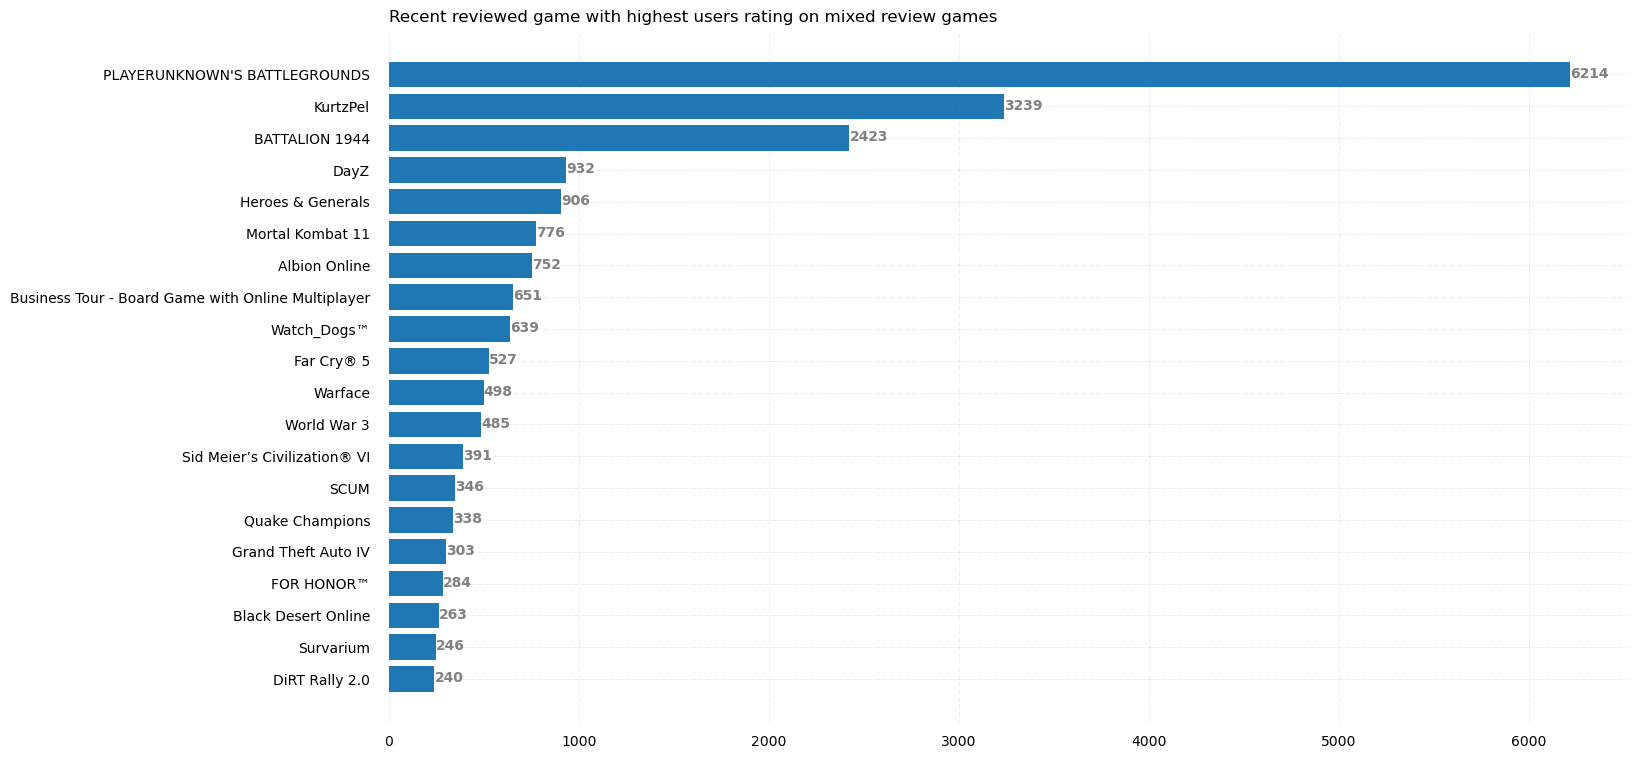

In [80]:
import seaborn as sns

data = rslt_df1
data.head()
df = pd.DataFrame(data)

name = df['name'].head(20)
number = df['Number of users(Recent Review)'].head(20)

fig , ax = fig, ax = plt.subplots(figsize =(16, 9))

ax.barh(name, number)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Recent reviewed game with highest users rating on mixed review games',
             loc ='left', )

plt.show()

 
# # Horizontal Bar Plot
# plt.bar(name[0:20], number[0:20])
 
# # Show Plot
# plt.show()


The graph above clearly shows that Playerunknown's battlegrounds has the highest recent users in mixed review categories, followed by KurtzPel and Battalion 1944.

# Conclusion

### Does the change in recent review of different games affect the overall rating of the game?

#### - The results shows that if there is a change in recent user's review, there will be a fluctuations (increase, decrease or no change) in very positive review on overall reviews that the user rated on the specific type of games.

### Which game receive the highest recent user's reviews in very positive rating categories?
#### -The graph above clearly shows that Counter-Strike game has the highest recent users in very positive review categories, followed by Rainbow Six Siege and Team Fortress 2.
    
### Which game receive the highest recent user's reviews in mixed rating categories?
#### - The graph above clearly shows that Playerunknown's battlegrounds has the highest recent users in mixed review categories, followed by KurtzPel and Battalion 1944.